In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

from thomas import thomas

Dim 10
Dim 100
Dim 250
Dim 500
Dim 1000


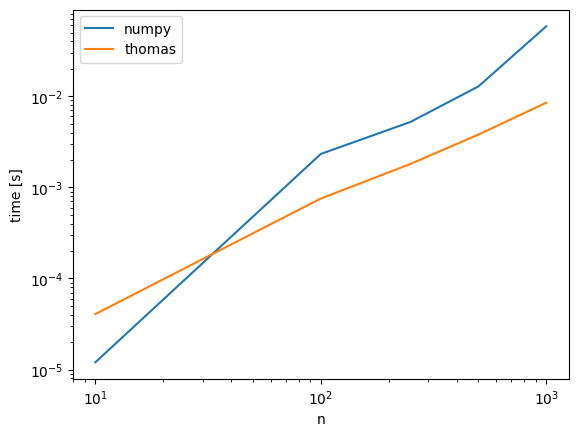

In [6]:
N = 1000 # number of runs
# nn = [10, 100, 250, 500, 1000, 2500, 5000, 10000] # size of the matrix
nn = [10, 100, 250, 500, 1000] # size of the matrix

time_numpy = np.zeros(len(nn))
time_thomas = np.zeros(len(nn))

index = 0
for n in nn:
    print("Dim", n)
    for i in range(N):
        # define the matrix
        A = np.zeros((n, n))
        # less trivial example (random matrix):
        for i in range(n):
            A[i, i] = 2
            if i < n - 1:
                A[i, i + 1] = np.random.rand()
                A[i + 1, i] = np.random.rand()

        # define the right-hand side
        b = np.ones(n)

        # numpy
        start = time.time()
        x = np.linalg.solve(A, b)
        time_numpy[index] += time.time() - start

        # thomas
        start = time.time()
        x = thomas(A, b)
        time_thomas[index] += time.time() - start

    index += 1

time_numpy /= N
time_thomas /= N

plt.plot(nn, time_numpy, label='numpy')
plt.plot(nn, time_thomas, label='thomas')
plt.xlabel('n')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
